In [3]:
import pandas as pd
import os

In [1]:
import netCDF4
import h5netcdf
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install copernicusmarine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 201.1 kB/s eta 0:00:000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 81.4 kB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 696.8 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 15.0.2
    Uninstalling pyarrow-15.0.2:
      Successfully uninstalled pyarrow-15.0.2
  Attempting uninstall: h5netcdf
    Found existing installation: h5netcdf 1.3.0
    Uninstalling h5netcdf-1.3.0:
      Successfully uninstalled h5netcdf-1.3.0


In [3]:
from copernicusmarine import login

login()

INFO - 2025-08-05T17:07:31Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:

  eholmes


Copernicus Marine password:

  ········


INFO - 2025-08-05T17:08:01Z - Credentials file stored in /home/jovyan/.copernicusmarine/.copernicusmarine-credentials.


True

In [9]:
catalog = copernicusmarine.describe()
catalog_dict = catalog.model_dump(exclude_none=True)
for product in catalog_dict['products']:
    if 'Daily' in product.get('title', '') and 'GLORYS' in product.get('title', ''):
        print(product['title'])
        for ds in product.get('datasets', []):
            print(" -", ds['dataset_id'])

Fetching catalogue 1: 100%|██████████| 2/2 [00:35<00:00, 17.51s/it] 


import copernicusmarine
copernicusmarine.__version__

In [10]:
copernicusmarine.subset(
  dataset_id="cmems_mod_glo_phy_my_0.083deg_P1D-m",
  variables=["uo", "vo"],
  minimum_longitude=50,
  maximum_longitude=90,
  minimum_latitude=0,
  maximum_latitude=25,
  start_datetime="2020-01-01",
  end_datetime="2020-01-31",
  minimum_depth=0,
  maximum_depth=30,
  output_filename = "Indian_currents_Jan2020.nc",
  output_directory = "copernicus-data"
)

INFO - 2025-08-05T17:16:24Z - Selected dataset version: "202311"
INFO - 2025-08-05T17:16:24Z - Selected dataset part: "default"
INFO - 2025-08-05T17:16:29Z - Starting download. Please wait...


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4333/546640193.py", line 3, in <module>
    subset(
  File "/srv/conda/envs/notebook/lib/python3.11/site-packages/copernicusmarine/core_functions/deprecated_options.py", line 78, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/srv/conda/envs/notebook/lib/python3.11/site-packages/copernicusmarine/python_interface/exception_handler.py", line 17, in wrapper
    raise exception
  File "/srv/conda/envs/notebook/lib/python3.11/site-packages/copernicusmarine/python_interface/exception_handler.py", line 13, in wrapper
    return function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/srv/conda/envs/notebook/lib/python3.11/site-packages/copernicusmarine/python_interface/subset.py", line 195, in subset
    return subset_

In [5]:
# 1a) Open the NetCDF files
# Adjust the file paths to match your Google Drive or local environment
glorys_ds = xr.open_dataset("cmems_mod_glo_phy_myint_0.083deg_P1D-m_1754330596254.nc")

In [6]:
print(glorys_ds)


<xarray.Dataset> Size: 736MB
Dimensions:    (time: 92, latitude: 139, longitude: 232, depth: 30)
Coordinates:
  * time       (time) datetime64[ns] 736B 2024-03-01 2024-03-02 ... 2024-05-31
  * latitude   (latitude) float32 556B 40.5 40.58 40.67 ... 51.83 51.92 52.0
  * longitude  (longitude) float32 928B -70.75 -70.67 -70.58 ... -51.58 -51.5
  * depth      (depth) float32 120B 0.494 1.541 2.646 ... 266.0 318.1 380.2
Data variables:
    bottomT    (time, latitude, longitude) float32 12MB ...
    mlotst     (time, latitude, longitude) float32 12MB ...
    so         (time, depth, latitude, longitude) float32 356MB ...
    thetao     (time, depth, latitude, longitude) float32 356MB ...
Attributes:
    Conventions:       CF-1.11
    title:             cmems_mod_glo_phy_myint_0.083deg_P1D-m_202311
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_MULTIYEAR_PHY_001_030
    subset:datasetId:  cmems_mod_glo_phy_myint_0.083deg_P1D-m_2

In [10]:
trawl_df = pd.read_csv('/home/jovyan/proj_2025_sdm/data/fisheries_with_pace_rrs_avw2.csv')

In [11]:
trawl_df['TOWDATETIME_EST'] = pd.to_datetime(trawl_df['TOWDATETIME_EST'])
print(trawl_df[['TOWDATETIME_EST', 'LAT', 'LON']].dtypes)

TOWDATETIME_EST    datetime64[ns]
LAT                       float64
LON                       float64
dtype: object


In [ ]:
# Print dataset summaries
print("\n=== GLORYS Dataset ===")
print(glorys_ds)
print("\n=== Trawl Data (pandas DataFrame) ===")
print(trawl_df.info()) # Use info() for DataFrame summary


# Compare dimensions (for GLORYS)
print("\n--- Compare Dimensions (GLORYS) ---")
print("GLORYS Dimensions:", glorys_ds.dims)

# Print DataFrame shape and columns (for trawl_df)
print("\n--- Trawl Data Shape and Columns ---")
print("Trawl DataFrame Shape:", trawl_df.shape)
print("Trawl DataFrame Columns:", trawl_df.columns.tolist())


# Check the first & last time values
print("\n--- Time Ranges ---")
print("GLORYS Time Range:", glorys_ds["time"].values[0], "to", glorys_ds["time"].values[-1])
# Assuming 'TOWDATETIME_EST' is the time column in trawl_df
print("Trawl Data Time Range:", trawl_df["TOWDATETIME_EST"].min(), "to", trawl_df["TOWDATETIME_EST"].max())

In [13]:
min_datetime = trawl_df['TOWDATETIME_EST'].min()
max_datetime = trawl_df['TOWDATETIME_EST'].max()

glorys_aligned = glorys_ds.sel(time=slice(min_datetime, max_datetime))

print(f"Original GLORYS time range: {glorys_ds.time.values[0]} to {glorys_ds.time.values[-1]}")
print(f"Trawl data time range: {min_datetime} to {max_datetime}")
print(f"Aligned GLORYS time range: {glorys_aligned.time.values[0]} to {glorys_aligned.time.values[-1]}")

Original GLORYS time range: 2024-03-01T00:00:00.000000000 to 2024-05-31T00:00:00.000000000
Trawl data time range: 2024-03-07 10:58:00 to 2024-05-13 07:15:00
Aligned GLORYS time range: 2024-03-08T00:00:00.000000000 to 2024-05-13T00:00:00.000000000


In [14]:
min_lat = trawl_df['LAT'].min()
max_lat = trawl_df['LAT'].max()
min_lon = trawl_df['LON'].min()
max_lon = trawl_df['LON'].max()

print(f"Trawl data latitude range: {min_lat} to {max_lat}")
print(f"Trawl data longitude range: {min_lon} to {max_lon}")

Trawl data latitude range: 34.4105285 to 44.425485
Trawl data longitude range: -75.939414 to -65.8127125


In [15]:
glorys_subset = glorys_aligned.sel(latitude=slice(min_lat, max_lat), longitude=slice(min_lon, max_lon))

print("\n--- GlorYS Subset Dimensions ---")
print(glorys_subset.dims)


--- GlorYS Subset Dimensions ---
FrozenMappingWarningOnValuesAccess({'time': 67, 'latitude': 48, 'longitude': 60, 'depth': 30})


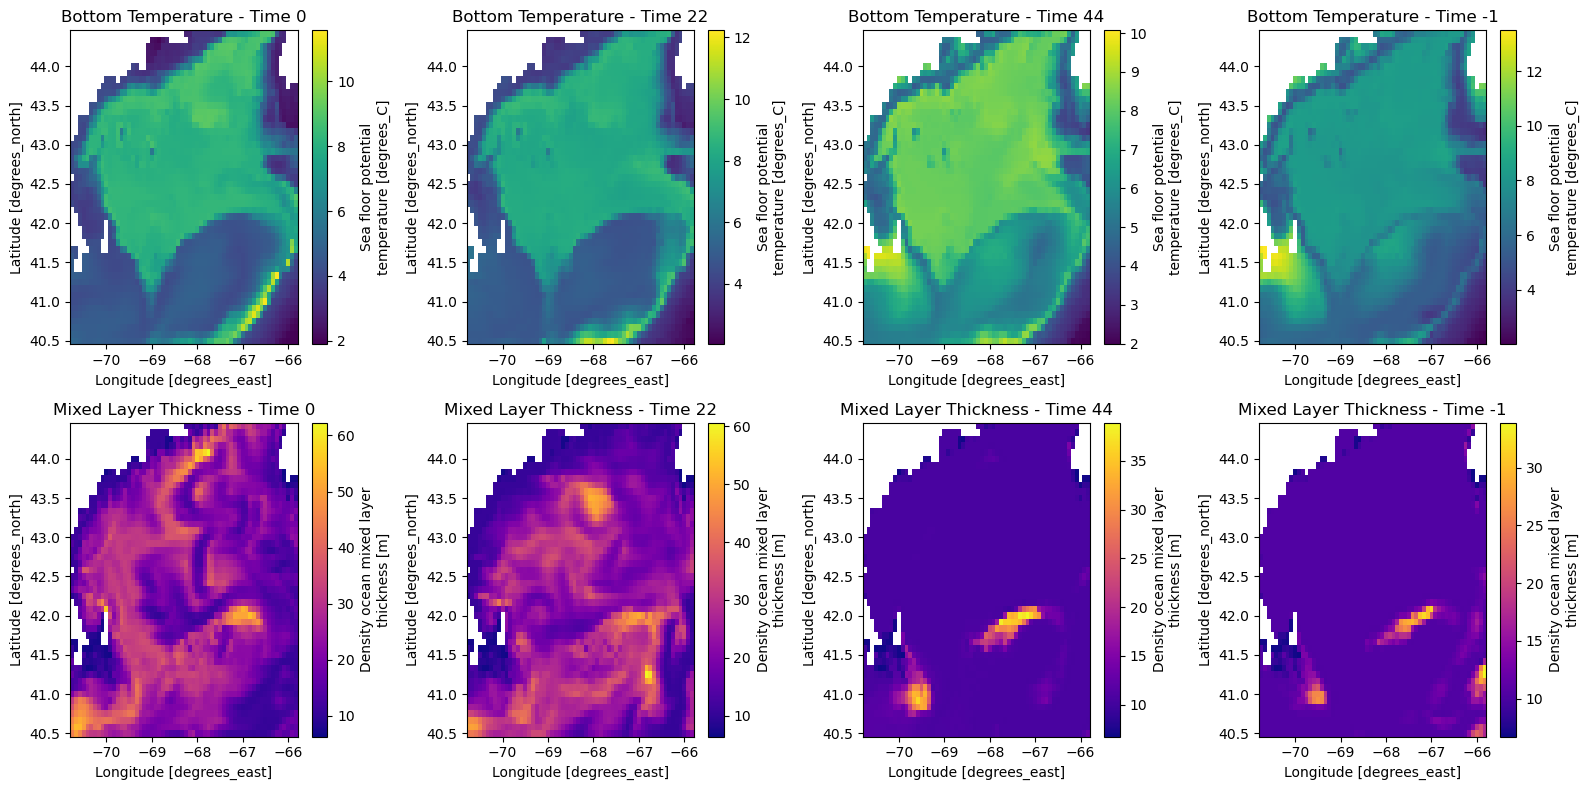

In [20]:
import xarray as xr
import matplotlib.pyplot as plt

# Select four time slices (modify indices if needed)
time_indices = [0, int(len(glorys_subset.time)/3), int(2*len(glorys_subset.time)/3), -1]

# Set up figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, t in enumerate(time_indices):
    # Plot 
    ax = axes[0, i]
    glorys_subset.bottomT.isel(time=t).plot(ax=ax, cmap="viridis")
    ax.set_title(f"Bottom Temperature - Time {t}")

    # Plot 2
    ax = axes[1, i]
    glorys_subset.mlotst.isel(time=t).plot(ax=ax, cmap="plasma")
    ax.set_title(f"Mixed Layer Thickness - Time {t}")

# Adjust layout
plt.tight_layout()
plt.show()
